In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir kaggle

In [ ]:
import os
import json 
kaggleAPIToken = {"username":"minhtbi","key":"5c090ffe0e6f413dc7d7d970d54b1f76"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(kaggleAPIToken, file)

In [ ]:
!chmod 600 /content/kaggle/kaggle.json
!sudo mkdir ~/.kaggle
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json
!mkdir dataset
!kaggle datasets download -d minhtbi/dataset-tuoi

 99% 75.0M/75.8M [00:01<00:00, 78.1MB/s]
100% 75.8M/75.8M [00:01<00:00, 51.9MB/s]


In [ ]:
!unzip /content/dataset-tuoi.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Dataset/40-55/48_1_3_20170119212118705.jpg  
  inflating: Dataset/40-55/48_1_4_20170104181540549.jpg  
  inflating: Dataset/6-20/10_0_0_20161220222308131.jpg  
  inflating: Dataset/6-20/10_0_0_20170103200329407.jpg  
  inflating: Dataset/6-20/10_0_0_20170103200522151.jpg  
  inflating: Dataset/6-20/10_0_0_20170103233459275.jpg  
  inflating: Dataset/6-20/10_0_0_20170104013211746.jpg  
  inflating: Dataset/6-20/10_0_0_20170110215927291.jpg  
  inflating: Dataset/6-20/10_0_0_20170110220033115.jpg  
  inflating: Dataset/6-20/10_0_0_20170110220111082.jpg  
  inflating: Dataset/6-20/10_0_0_20170110220235233.jpg  
  inflating: Dataset/6-20/10_0_0_20170110220251986.jpg  
  inflating: Dataset/6-20/10_0_0_20170110220255346.jpg  
  inflating: Dataset/6-20/10_0_0_20170110220316298.jpg  
  inflating: Dataset/6-20/10_0_0_20170110220403810.jpg  
  inflating: Dataset/6-20/10_0_0_20170110220447314.jpg  
  inflating: Dataset/6-20/10_

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
class_name = ['21-38','40-55','6-20','60-90']
path = '/content/Dataset/'

target_name = {'21-38': 0, '40-55': 1,'6-20': 2, '60-90': 3}
X, y = [], []
for age in class_name:
    for img_name in os.listdir(path+age):
        img = cv2.imread(path + age +'/'+ img_name)
        scalled_raw_img = cv2.resize(img, (96, 96))/255.0
        X.append(scalled_raw_img)
        y.append(target_name[age])

In [ ]:
X, y = np.array(X), np.array(y)
X.shape, y.shape

((8932, 96, 96, 3), (8932,))

In [ ]:
y = tf.keras.utils.to_categorical(y, num_classes=4)
y.shape

(8932, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 96, 96, 3), (1787, 96, 96, 3), (7145, 4), (1787, 4))

In [ ]:
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(96, 96, 3),
    pooling='avg',
    classes=4,
    classifier_activation="softmax",)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 20,869,676
Trainable params: 20,815,148
Non-trainable params: 54,528
_________________________________________________________________


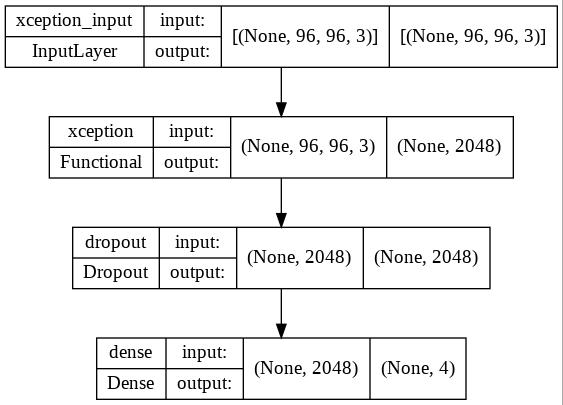

In [ ]:
tf.keras.utils.plot_model(model, 'model_tuoi.jpg', show_shapes=True)

In [ ]:
my_calls = [EarlyStopping(monitor="val_accuracy",patience=5),
            ModelCheckpoint("Model_tuoi.h5",verbose= 1 ,save_best_only=True)]

In [ ]:
model1 = model.fit(x=X_train, y=y_train, batch_size=256, epochs=20, validation_data=(X_test, y_test),callbacks=my_calls)

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 1.2437 - accuracy: 0.4386
Epoch 1: val_loss improved from inf to 2.10402, saving model to Model_tuoi.h5
28/28 [==============================] - 128s 4s/step - loss: 1.2437 - accuracy: 0.4386 - val_loss: 2.1040 - val_accuracy: 0.4130
Epoch 2/20
28/28 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.7233
Epoch 2: val_loss did not improve from 2.10402
28/28 [==============================] - 121s 4s/step - loss: 0.6617 - accuracy: 0.7233 - val_loss: 8.4452 - val_accuracy: 0.4510
Epoch 3/20
28/28 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.8297
Epoch 3: val_loss improved from 2.10402 to 1.30200, saving model to Model_tuoi.h5
28/28 [==============================] - 121s 4s/step - loss: 0.4241 - accuracy: 0.8297 - val_loss: 1.3020 - val_accuracy: 0.7577
Epoch 4/20
28/28 [==============================] - ETA: 0s - loss: 0.2543 - accuracy: 0.9020
Epoch 4: val_loss did not i

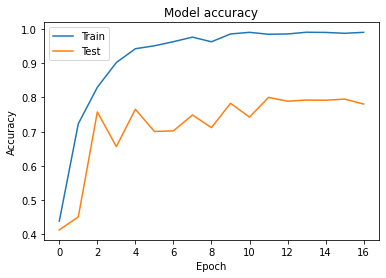

In [ ]:
fig, ax = plt.subplots(1,1)
plt.plot(model1.history["accuracy"],)
plt.plot(model1.history['val_accuracy'],)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

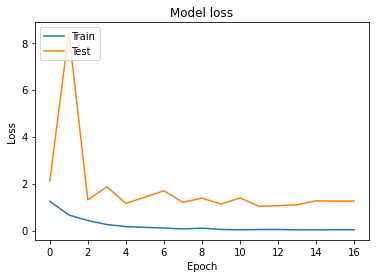

In [ ]:
fig, ax = plt.subplots(1,1)
plt.plot(model1.history['loss'],)
plt.plot(model1.history['val_loss'],)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Classification Report
              precision    recall  f1-score   support

       21-38       0.75      0.66      0.70       502
       40-55       0.60      0.65      0.63       262
        6-20       0.77      0.88      0.82       486
       60-90       0.92      0.86      0.89       537

    accuracy                           0.78      1787
   macro avg       0.76      0.76      0.76      1787
weighted avg       0.78      0.78      0.78      1787



Text(69.0, 0.5, 'Predicted')

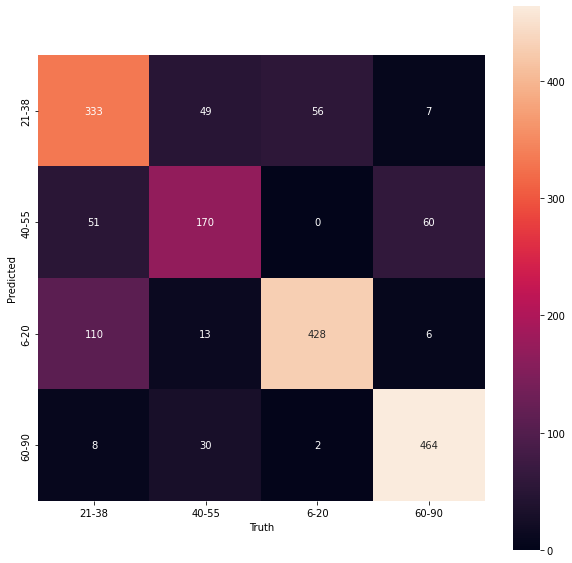

In [ ]:
y_pred = np.argmax(model.predict(X_test,batch_size=1), axis=1) 

print('Classification Report')
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
report = classification_report(y_classes, y_pred, target_names=target_name.keys())
print(report)

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_name.keys(),yticklabels=target_name.keys())
plt.xlabel('Truth')
plt.ylabel('Predicted')